<a href="https://colab.research.google.com/github/shrishpellakur00/Image-Classification-Neural-Networks/blob/main/dog_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "drive/My Drive/Dog/dog-breed-identification.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

Work Space

1) Import Tensorflow
2) Import Tensorflow Hub
3) Make sure we're using a GPU

In [2]:
#Importing Tensor Flow

import tensorflow as tf
import tensorflow_hub as hub

print("Tensor flow version: ",tf.__version__ )
print("Tensoe flow hub version: ",hub.__version__)

#Check for GPU availability

print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

Tensor flow version:  2.4.1
Tensoe flow hub version:  0.11.0
GPU available


Getting our data ready (Turning them into tensors)

For our machine learning models, we need to convert our data into numerical representation. We need to turn them into tensors and then start working with them. We will start by acessing the data and checking the labels

In [3]:
#Check out the labels in our data

import pandas as pd
labels_csv = pd.read_csv("/content/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     e3a6203b61fa9cd2ffad92ebe31334ca  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [4]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


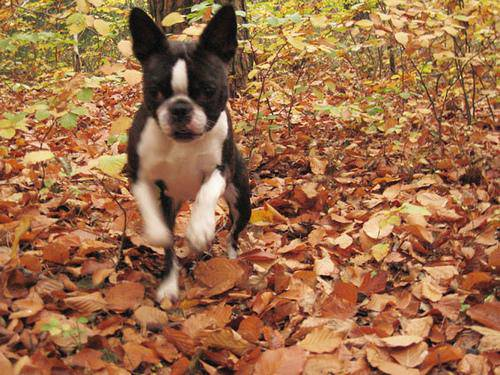

In [5]:
from IPython.display import Image

Image("train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [6]:
## Getting images and their labels

##Create pathnames from image IDs

filenames = ["train/" +fname +".jpg" for fname in labels_csv["id"]]
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

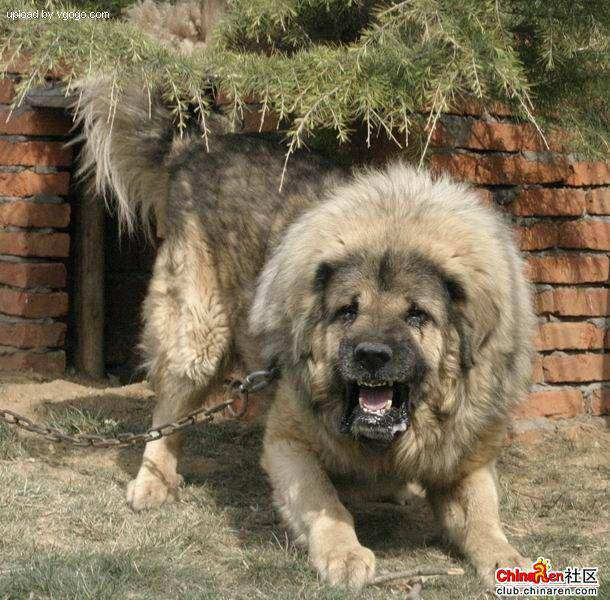

In [7]:
Image(filenames[9000])

In [8]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [9]:
##Converting them to numbers

import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

#Find the number of labels
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [10]:
##Find the unique breeds in the dataset

unique_breed = np.unique(labels)
unique_breed

#Find the number of unique breeds
len(unique_breed)

120

In [11]:
#Turn the labels into numbers using numpy

print(labels[0])
labels[0] == unique_breed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [12]:
## Turn every label into boolean arrays

boolean_labels = [label == unique_breed for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [13]:
## Turning Boolean arrays into integers

print(labels[0]) #Original label
print(np.where(unique_breed == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean matrix
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Creating our own Validation data set

In [14]:
## Set up X and y variables

X = filenames
y = boolean_labels


We are going to start off with 1000 images and then later on we will increase

In [15]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:100}

In [16]:
## Let's split our data into training and validation data

from sklearn.model_selection import train_test_split

#Split them into train and validation data based on NUM_IMAGES

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [17]:
## Checking the training data 

X_train[:5],y_train[:2]

(['train/00bee065dcec471f26394855c5c2f3de.jpg',
  'train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fa

## Pre-processesing Images (turning images into tensors)

To preprocess our images into tensors, we need to write a function which does the following:

1. Take an image file path as input
2. Use Tensorflow to read the image and save it to a variable
3. Turn our variables into tensors
4. Normalize out image (convert the color channel values from 0-255 to 0-1 values)
4. Resize the variable to be a shape of (224,224)
5. Return the modified image

In [18]:
# Convert image to Numpy array

from matplotlib.pyplot import imread
image  = imread(filenames[42])
image.shape

(257, 350, 3)

In [19]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [20]:
#Turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [21]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessessing images

def processs_image(image_path, img_size=IMG_SIZE):
  """

  Takes a image file path and converts it to tensor

  """

  # Read in a file image
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical tensor with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)

  # Resize the image
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

Turning our data into batches

Why do we need to turn our data into batches? 
When we try to process a large number of images in one go, they may not all fit into the memory. So, that is why we have a batch size of about 32. ie 32 images at a time. We can manually adjust a batch size whenever needed.

In order to use Tensorflow effectively, we need out data in the form of Tupples which look like this: 
`(image, label)`

In [22]:
# Function that returns a tuple

def get_image_label(image_path, label):

  """
  Take an image file path and the associated label, processess the image and returns a tuple of (image, label)
  """
  image = processs_image(image_path)
  return image, label 

In [23]:
#Demo of the function
(processs_image(X[42]),y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

We have a way to turn all our data into tuples in the form `(image, label)`. Now we have to convert it to batches of the form (`X` & `y`)

In [24]:
# Define a batch size
BATCH_SIZE = 32

#Create a function to turn data into batches

def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data=False, test_data=False):

  """
  Creates batches of data from image (X) and label (y) pairs
  Shuffles the data if it's training data, but does not shuffle it if it's validation data
  Also accepts test data as input (no label)
  """

  # If the data is a test data, we don't need any labels
  if test_data:
    print("Creating batches for test data...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) #only file paths, no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is valid data, we need label and image, but we don't need to shuffle it
  elif valid_data:
    print("Creating batches for valid data...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepath
                                              tf.constant(y))) #label
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is training data, we need label and image and we also need to shuffle it
  else:
    print("Creating batches for training data...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #images
                                              tf.constant(y))) #labels
    # Shuffling the image pathnames before mapping the image is faster than shuffling the image after
    data = data.shuffle(buffer_size = len(X))

    # Create (image, label) tuples, this also turns image path into pre processed image
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch                                     


In [45]:
# Creating training and validation data batches

train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val, y_val, valid_data=True)

Creating batches for training data...
Creating batches for valid data...


##Visualzing Data Batches

Our data is in batches. It is difficult to analyze the data like this. Visualizing help to see clearly

In [26]:
import matplotlib.pyplot as plt

## Create a function for viewing images in a batch
def show_25_images(images, labels):
  """
    Displays a plot of 25 images and their labels from a batch
  """
  # Setup the figure
  plt.figure(figsize=(10,10))

  #Loop through 25 images for displaying them 
  for i in range(25):
    #Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    #Display an image
    plt.imshow(images[i])
    #Add image label as the title
    plt.title(unique_breed[labels[i].argmax()])
    #Turn the grid lines off
    plt.axis('off')

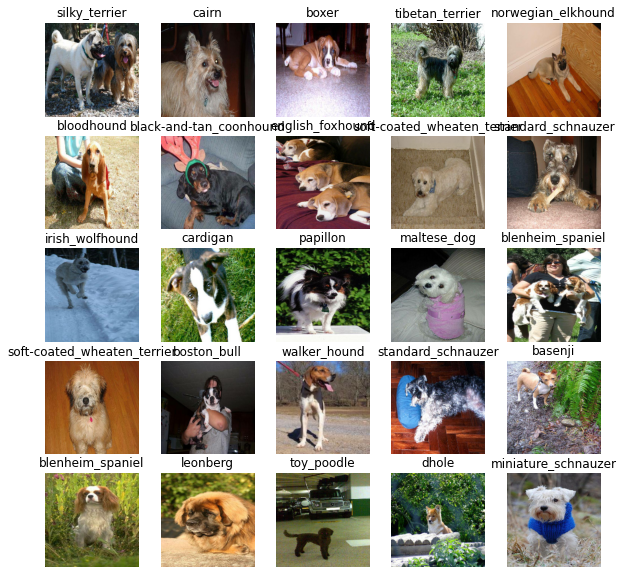

In [27]:
# Let's visualize the data in training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

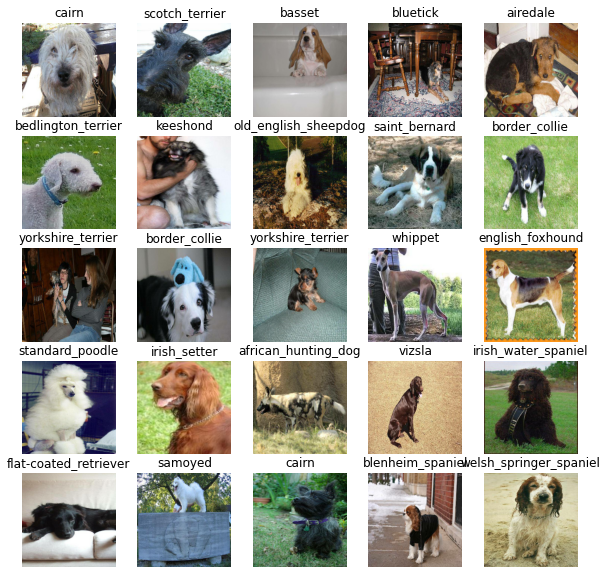

In [28]:
# Let's visualize the data in the validation set

val_images, val_labels = next(valid_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Building a model

Before building a model, there are few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use 

In [29]:
IMG_SIZE 

224

In [30]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Setup output shape to the model
OUTPUT_SHAPE = len(unique_breed)

# Setup model URL from Tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

We have input, output and the model ready to go. We will put them together in the Keras deep learning model!

Knowing this, we create a function that:

* Takes the input shape, output shape and the model we have chosen as parameters
* Defines the layers in the Keras model in a sequential fashion
* Compiles the model (evaluation and improvement)
* Builds the model (tell the model the input shape it will be getting)
* Returns the model

In [31]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer) # Sigmoid activation layer because it is multiclass classification
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model
  

In [32]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [33]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [34]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [35]:

# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [36]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [37]:

# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [46]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [47]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 14s 175ms/step - loss: 5.2393 - accuracy: 0.0366 - val_loss: 3.3876 - val_accuracy: 0.2300
Epoch 2/100
25/25 [==============================] - 4s 141ms/step - loss: 1.9721 - accuracy: 0.6263 - val_loss: 2.1842 - val_accuracy: 0.4650
Epoch 3/100
25/25 [==============================] - 3s 139ms/step - loss: 0.6288 - accuracy: 0.9421 - val_loss: 1.7025 - val_accuracy: 0.5650
Epoch 4/100
25/25 [==============================] - 3s 139ms/step - loss: 0.2658 - accuracy: 0.9815 - val_loss: 1.5106 - val_accuracy: 0.5950
Epoch 5/100
25/25 [==============================] - 3s 139ms/step - loss: 0.1530 - accuracy: 0.9976 - val_loss: 1.4442 - val_accuracy: 0.6450
Epoch 6/100
25/25 [==============================] - 3s 139ms/step - loss: 0.1073 - accuracy: 1.0000 - val_loss: 1.3997 - val_accuracy: 0.6500
Epoch 7/100
25/25 [=============================

In [42]:
import os

In [49]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(valid_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 1s 101ms/step


array([[2.1789300e-03, 4.1320029e-04, 7.0768036e-04, ..., 2.7952371e-03,
        2.1999456e-04, 3.3520714e-03],
       [7.4552110e-04, 2.3052194e-03, 1.1797118e-02, ..., 6.9584021e-05,
        2.7504732e-04, 6.3089567e-05],
       [6.6725202e-05, 6.2662048e-06, 2.0629146e-05, ..., 4.3784139e-06,
        2.2931452e-05, 4.5817109e-05],
       ...,
       [6.4104446e-05, 2.2778459e-05, 2.5952610e-05, ..., 9.1333804e-06,
        7.8154808e-06, 1.1741386e-04],
       [2.5723160e-03, 3.3112991e-04, 6.3641847e-04, ..., 9.2403381e-04,
        8.6671105e-05, 1.2794473e-02],
       [3.1351103e-04, 3.4769855e-06, 7.2891975e-04, ..., 1.6090410e-03,
        1.0192278e-03, 1.3837387e-04]], dtype=float32)

In [50]:

# Check the shape of predictions
predictions.shape

(200, 120)

In [52]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breed[np.argmax(predictions[0])]}") # the predicted label

[2.17892998e-03 4.13200294e-04 7.07680359e-04 6.26185792e-05
 8.61932233e-04 4.16320145e-05 1.60376891e-01 7.93120591e-04
 3.02998633e-05 2.73821439e-04 1.75933790e-04 1.63349774e-04
 1.86958094e-03 9.52814371e-05 1.31936639e-03 3.20834020e-04
 1.57956572e-04 1.35839775e-01 5.03137599e-05 1.02922648e-04
 2.98183644e-03 1.38943404e-04 2.44239607e-04 2.48713722e-03
 3.19028273e-04 7.55427580e-04 9.97356176e-02 2.25876545e-04
 2.29130639e-03 6.20557694e-04 7.14091730e-05 7.61131814e-04
 2.71681254e-03 1.89752172e-04 1.86726626e-04 2.17473712e-02
 5.09350102e-05 7.51753745e-04 1.43679354e-04 3.10340722e-04
 1.60441734e-03 1.94695731e-05 3.92044349e-05 2.38469656e-04
 3.32092823e-05 1.96373730e-04 7.16142749e-05 1.26644853e-04
 1.07677327e-03 2.04537835e-04 8.26640171e-05 3.89146262e-05
 2.14442451e-04 1.70308151e-04 8.72054079e-05 4.16670218e-06
 4.59269271e-04 1.34064443e-02 3.97758296e-04 9.95333716e-02
 1.30549213e-03 3.14076344e-04 1.21138268e-03 5.09091733e-05
 2.42590508e-03 6.258097

In [54]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breed[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'australian_terrier'